In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ShowImage(img, gray):
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

In [3]:
def rgb_to_cmyk(img, rgb_scale, cmyk_scale):
    R = img[:, :, 2].astype(np.float16)/rgb_scale
    G = img[:, :, 1].astype(np.float16)/rgb_scale
    B = img[:, :, 0].astype(np.float16)/rgb_scale
    
    C, M, Y = 1 - R, 1 - G, 1 - B
    min_cym = np.minimum.reduce([C, M, Y])
    
    C = (C-min_cym)*cmyk_scale
    M = (M-min_cym)*cmyk_scale
    Y = (Y-min_cym)*cmyk_scale
    K = min_cym*cmyk_scale
    return C.astype(np.uint8),M.astype(np.uint8),Y.astype(np.uint8),K.astype(np.uint8)

In [4]:
img_rgb = cv2.imread('./images/color.png')

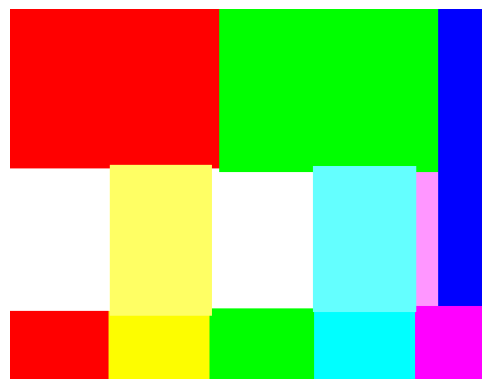

In [5]:
ShowImage(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB), False)

In [6]:
c, m, y, k = rgb_to_cmyk(img_rgb, 255, 255)

In [7]:
print(np.amax(c),np.amax(m),np.amax(y), np.amax(k))

255 255 255 1


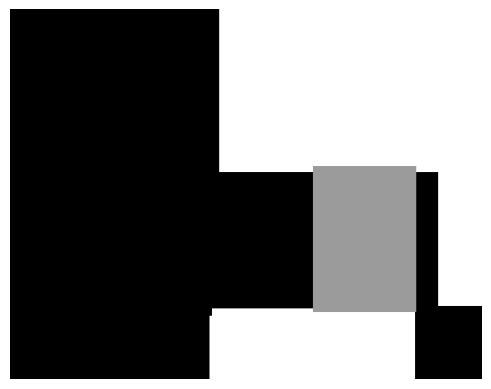

In [8]:
ShowImage(c, True)

In [10]:
y

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)